# EDA - Data Science Salaries 2023 💸
### This notebook is looking to identify patterns in data science salaries and determine what are the factors that lead to higher paying salaries

### Imports - Data reading

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
pd.set_option('display.max_columns', 200)


In [2]:
df = pd.read_csv('./data/datascience_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


🟣 **work_year:** The year in which the salary was paid<br>
🟣 **experience_level:** The experience level that the job was requiring<br>
🟣 **employment_type:** The way in which the employee was hired<br>
🟣 **job_title:** The job title<br>
🟣 **salary:** The total amount paid<br>
🟣 **salary_currency:** The currency in which the salary was paid<br>
🟣 **salary_in_usd:** The amount paid in USD<br>
🟣 **employee_residence:** The employee's place of residence during the work year (Country)<br>
🟣 **remote_ratio:** The rate between the full amount of work and do work donde remotly (0 -> No remote work or less than 20%, 50 -> Partially Remote, 100 -> Fully Remote)<br>
🟣 **company_location:** The country in which the company that is hiring is located<br>
🟣 **company_size:** Categorical value classifing the company by size (S -> Les than 50 employees, M -> 50 to 250 employees, L -> More than 250 employees)<br>

🔴 **None** of the columns have null value<br>
🔴 5 of the 12 columns are numeric **(41.6%)**<br>
🔴 7 of the 12 columns are string **(58.3%)**<br>
🔴 Dataset contains **607 rows**

### Initial understanding of numeric values

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


- **work_year:**
  - The year range of the dataset is between 2020 and 2022
- **salary_in_usd:**
  - Salaries range from $2,859 USD and $600,000 USD
  - The average of the salaries paid in the dataset is $112,297 USD
- **remote_ratio**
  - It should be considerd as a categorical value with 3 posible values

### Initial understanding of string values

In [6]:
df.describe(include=['object'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


- **experience_level**:
  - There are 4 unique values ("EN" -> Entry Level, "MI" -> Mid Level / Junior, "SE" -> Intermediate / Senior Level, "EX" -> Expert / Executive Level / Director).
  - The most frequent value is "SE" (Intermediate / Senior Level)  **(280 -> 46%)**

- **employment_type**:
  - There are 4 unique values ("PT" -> Part Time, "FT" -> Full Time, "CT" -> Contract / Freelance).
  - The most frequent value is "FT" (Full Time)  **(588 -> 97%)**
  
- **job_title**:
  - There are 50 unique values.
  - The most frequent value is "Data Scientist" **(143 -> 24%)**

- **salary_currency**:
  - There are 17 unique values.
  - The most frequent value is "USD" (United States Dollar)" **(398 -> 66%)**

- **employee_residence**:
  - There are 57 different locations of residence for employees in the dataset.
  - The most frequent value is "US" (United States) **(332 -> 55%)**

- **company_location**:
  - There are 50 different company locations.
  - The most frequent value is "US" (United States)  **(355 -> 58%)**

- **company_size**:
  - There are 3 unique values ("S" -> Small, "M" -> Medium, "L" -> Large).
  - The most frequent value is "M" (Medium) (326 -> 54%)

### Data Preparation

#### We look for duplicate rows

In [7]:
df.loc[df.duplicated()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


There are no duplicated values

#### Delete Columns with similar information or not relevant

In [7]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

- salary_in_usd and salary have the same information, so we can delete salary.
- unnamed is not used for this analysis so its deleted as well as salary_currency

In [65]:
df = df[['work_year', 'experience_level', 'employment_type',
       'job_title', 
       #'salary_currency',
       #'salary', 
       'salary_in_usd',
       'employee_residence','remote_ratio', 'company_location',
       'company_size']].copy()

In [10]:
df.shape

(607, 10)

### Feature Understanding

<Axes: >

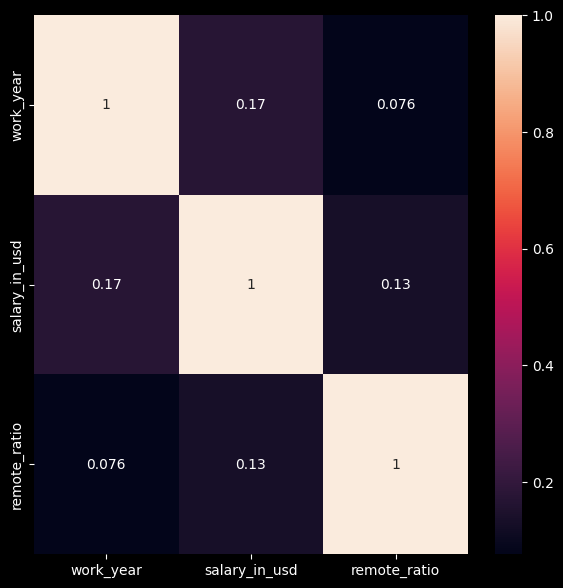

In [98]:
df_corr = df[['work_year', 'salary_in_usd','remote_ratio']].corr()
plt.figure(figsize=(7,7))
sns.heatmap(df_corr,annot=True)

- In a further step categorical ordinal values will be normalized and this step will be repetead
- There is only postive correlation between variables

<Axes: ylabel='salary_in_usd'>

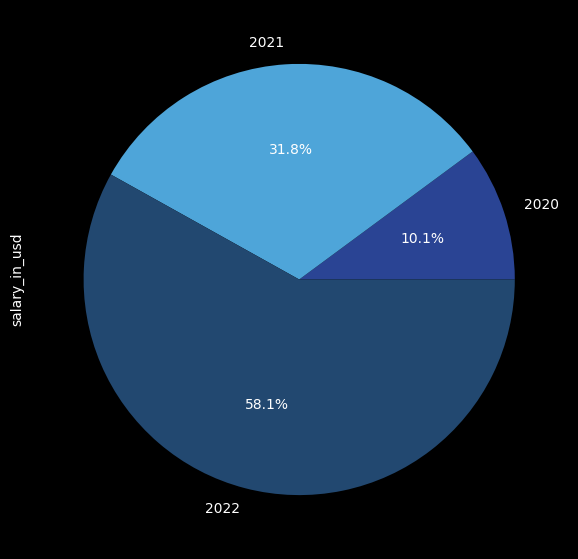

In [99]:

plt.figure(figsize=(7,7))
df.groupby(['work_year']).sum()['salary_in_usd'].plot(kind="pie",autopct='%1.1f%%',colors=['#2A4494', '#4EA5D9', '#224870' ])

- **Data is not evenly distributed**
- There are more rows for 2022 compared to 2021 and 2020

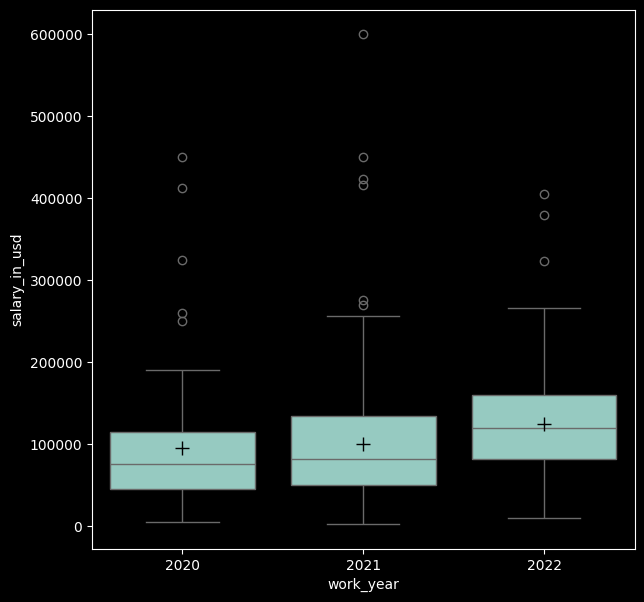

In [100]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(x='work_year',y='salary_in_usd',data=df,showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

<Axes: ylabel='salary_in_usd'>

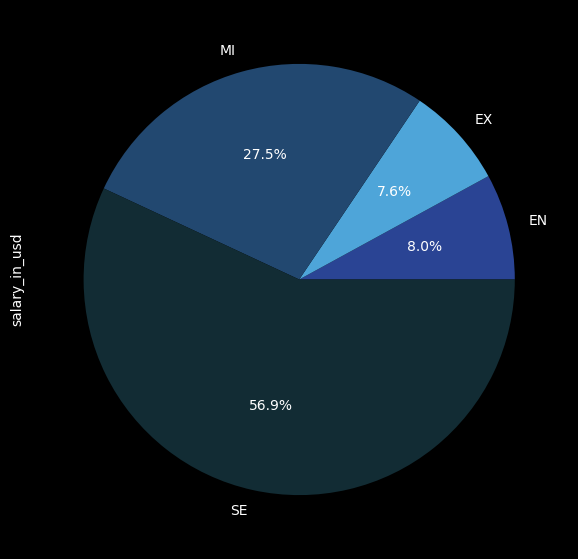

In [120]:
plt.figure(figsize=(7,7))
df.groupby(['experience_level']).sum()['salary_in_usd'].plot(kind="pie",autopct='%1.1f%%',colors=['#2A4494', '#4EA5D9', '#224870',"#122C34" ])

- There is more information about senior-level jobs compared to other experience levels.
- The experience level that has the least information is expert.

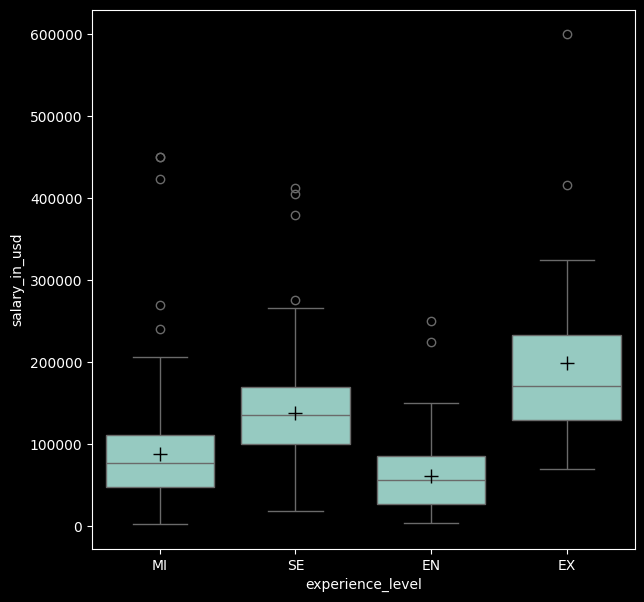

In [102]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(x='experience_level',y='salary_in_usd',data=df,showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

- We can observe that all experience levels contain outliers in the data; however, MI and EX experience levels have the largest outliers compared to the other levels.
- For the expert/director experience level, we can notice that the median is farthest from the mean, indicating an asymmetrical distribution.
- The interquartile range for the experience levels makes sense (Entry being the lowest paid and Expert being the highest paid).
- There is significant overlap between Entry and Mid Junior levels, as well as significant overlap between Senior and Expert levels.

<Axes: ylabel='salary_in_usd'>

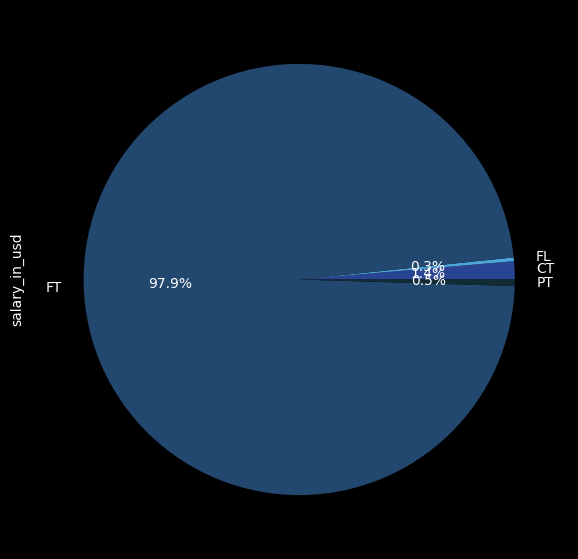

In [119]:
plt.figure(figsize=(7,7))
df.groupby(['employment_type']).sum()['salary_in_usd'].plot(kind="pie",autopct='%1.1f%%',colors=['#2A4494', '#4EA5D9', '#224870',"#122C34" ])


- There is significantly more information about Full Time jobs compared to the other employment types

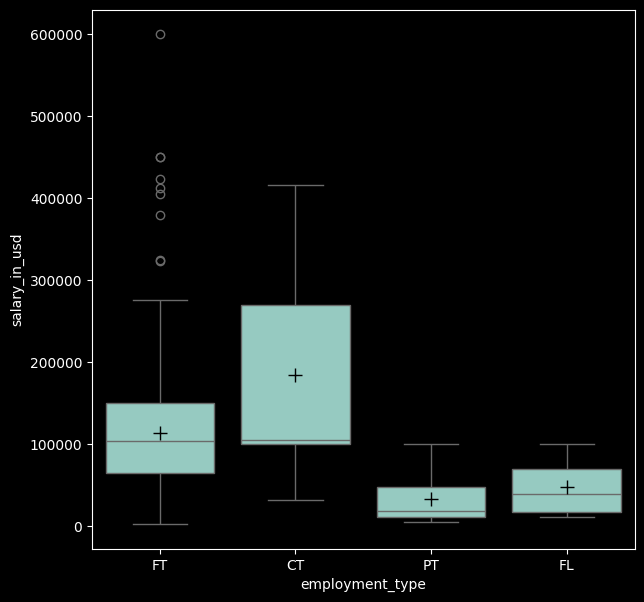

In [104]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(x='employment_type',y='salary_in_usd',data=df,showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

- The salary range is significantly higher for employment type contracts compared to other types. However, the large distance between the median and mean indicates an asymmetrical distribution.
- The lowest employment type is part-time.

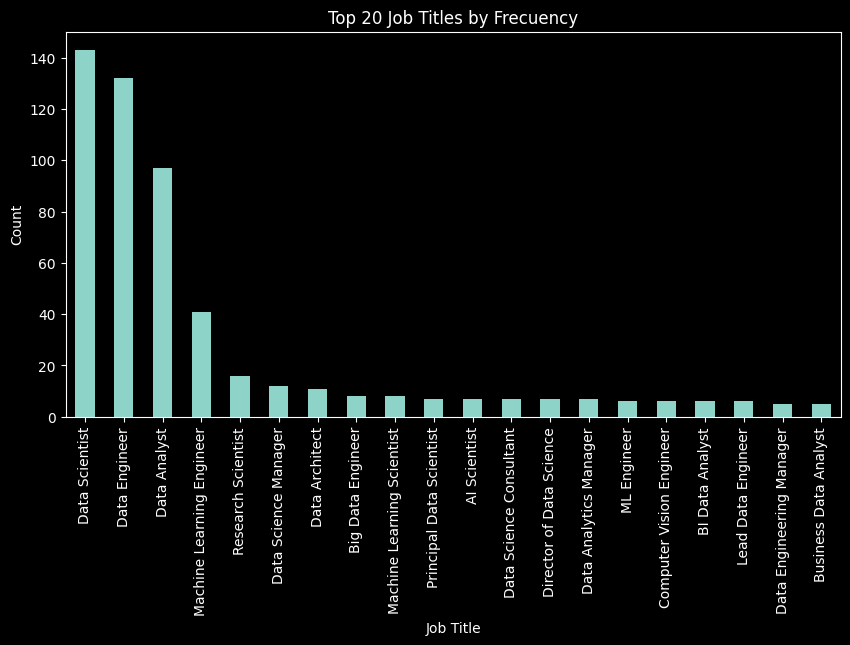

In [110]:
plt.figure(figsize=(10,5))
ax = df['job_title'].value_counts().head(20).plot(kind='bar',title='Top 20 Job Titles by Frecuency')
ax.set_xlabel('Job Title')
ax.set_ylabel('Count')
plt.show()



- The top three job titles with the most information are Data Scientist, Data Engineer, and Data Analyst.

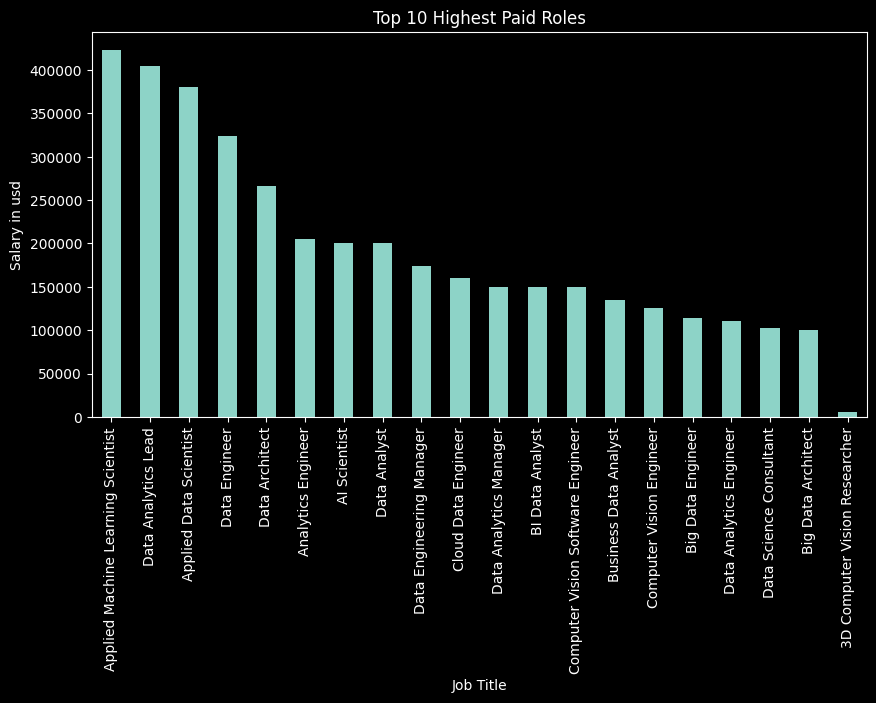

In [109]:
ax = df.groupby('job_title')['salary_in_usd'].max().head(20).sort_values(ascending=False).plot(kind='bar',figsize=(10,5),title='Top 10 Highest Paid Roles')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary in usd')
plt.show()


- The highest-paid job title is Applied Machine Learning Scientist, followed by Data Analytics and Applied Data Scientist.
- The difference between salaries, taking into account the top three paid job titles, is not significant.

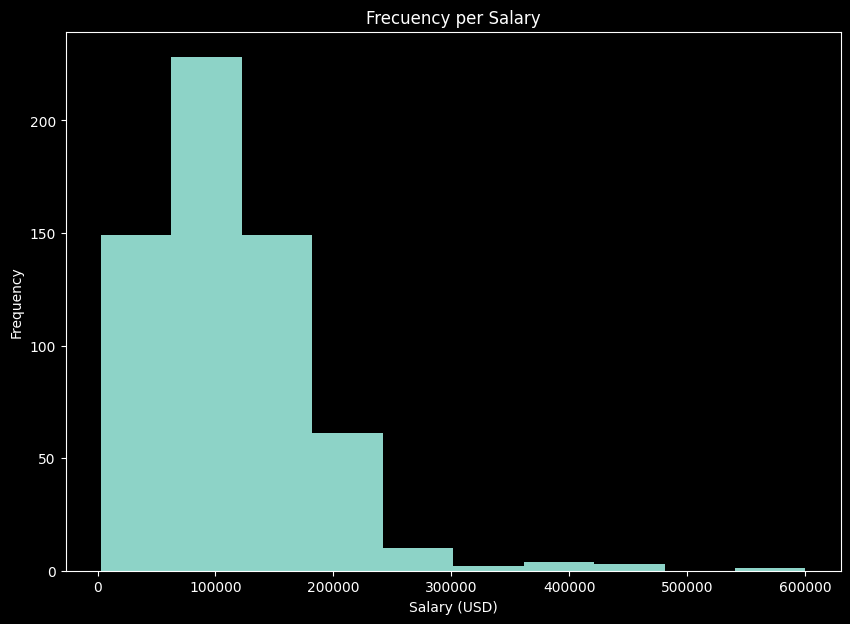

In [111]:
plt.figure(figsize=(10,7))
ax = df['salary_in_usd'].plot(kind='hist',title='Frecuency per Salary')
ax.set_xlabel('Salary (USD)')
plt.show()

- The highest peak of the histogram is located around $100,000 USD, which indicates that most job salaries are around this value.

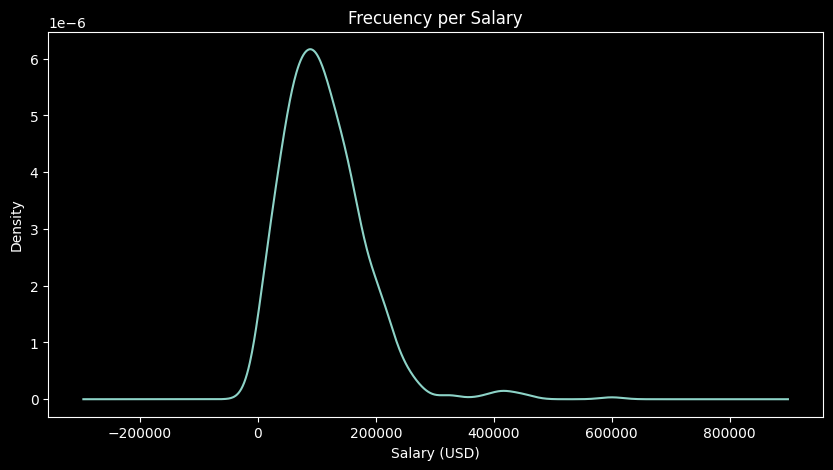

In [113]:
plt.figure(figsize=(10,5))
ax = df['salary_in_usd'].plot(kind='kde',title='Frecuency per Salary')
ax.set_xlabel('Salary (USD)')
plt.show()

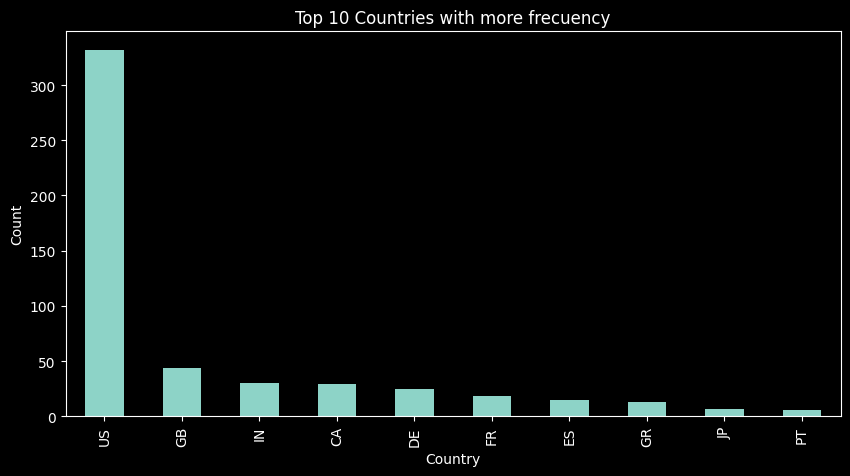

In [72]:
plt.figure(figsize=(10,5))
ax = df['employee_residence'].value_counts().head(10).plot(kind='bar',title='Top 10 Countries with more frecuency')
ax.set_xlabel('Country of residence')
ax.set_ylabel('Count')
plt.show()


- The majority of employee residence in the dataset is in the United States.

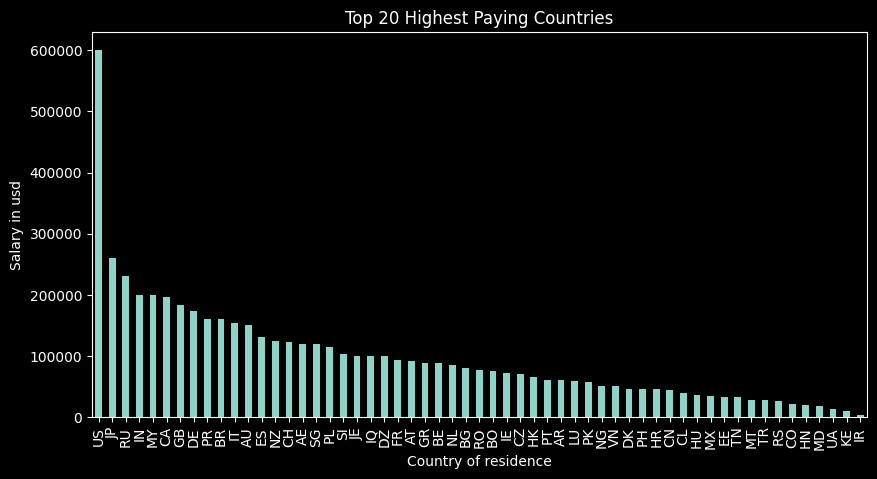

In [78]:
ax = df.groupby('employee_residence')['salary_in_usd'].max().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),title='Top 20 Highest Paying Countries')
ax.set_xlabel('Country of residence')
ax.set_ylabel('Salary in usd')
plt.show()


- The top 3 paying countries are Usa, Japan, and Russia.
- However, United States is paying significantly more.

<Axes: ylabel='salary_in_usd'>

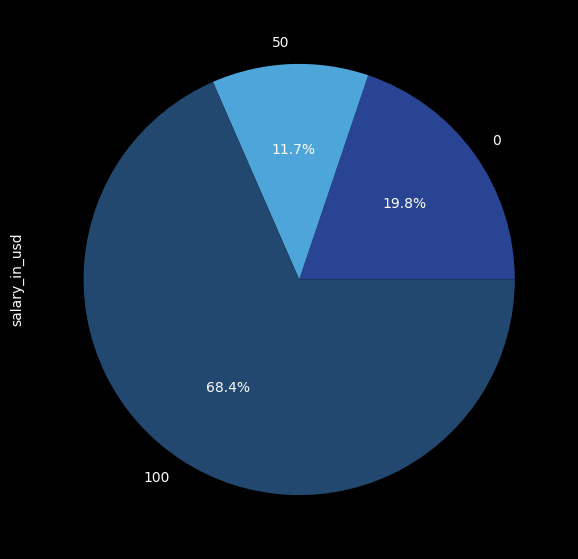

In [121]:
plt.figure(figsize=(7,7))
df.groupby(['remote_ratio']).sum()['salary_in_usd'].plot(kind="pie",autopct='%1.1f%%',colors=['#2A4494', '#4EA5D9', '#224870',"#122C34" ])

- There is significantly more fully remote job information compared to the other remote levels.

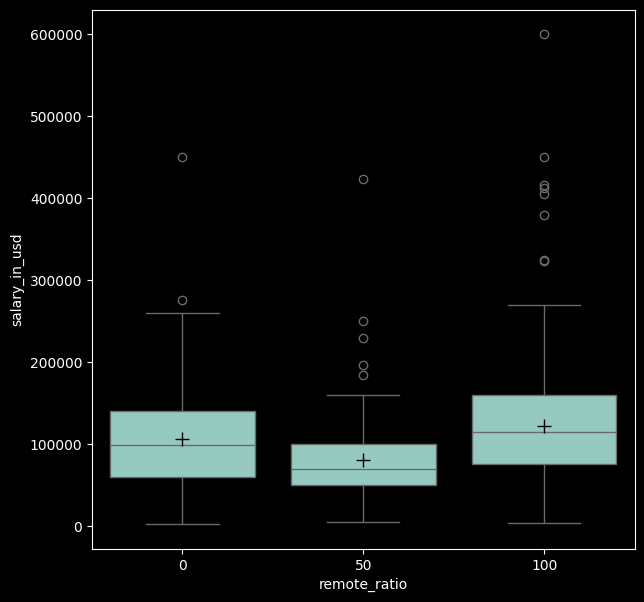

In [114]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(x='remote_ratio',y='salary_in_usd',data=df,showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

- Fully remote jobs have an higher salary range compared to the orher remote ratios.
- There is a significant overlap between fully remote and no remote.

<Axes: ylabel='salary_in_usd'>

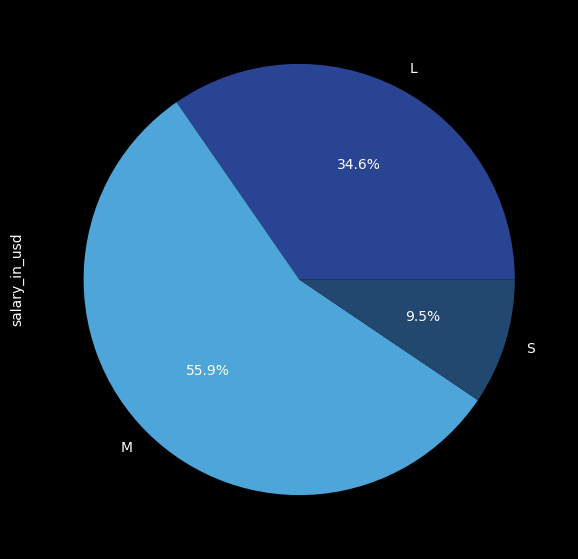

In [122]:
plt.figure(figsize=(7,7))
df.groupby(['company_size']).sum()['salary_in_usd'].plot(kind="pie",autopct='%1.1f%%',colors=['#2A4494', '#4EA5D9', '#224870',"#122C34" ])

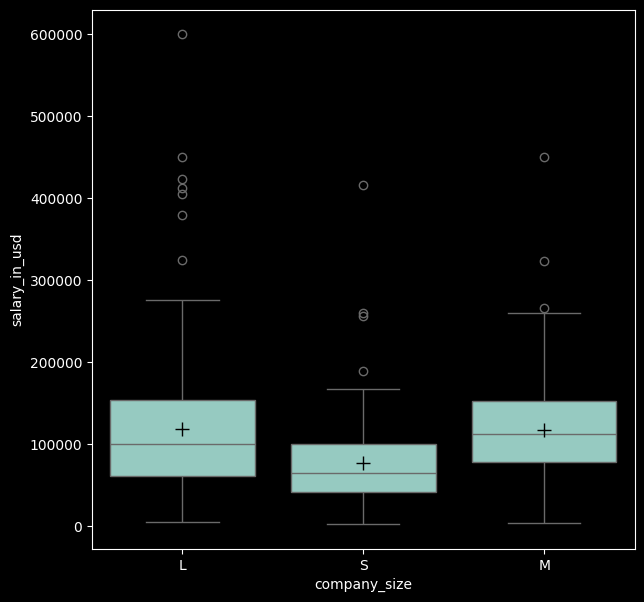

In [115]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(x='company_size',y='salary_in_usd',data=df,showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

- Small companies pay less compared to medium and large companies.
- However, there is a significant overlap in the interquartile range of salaries between large and medium companies.
- Large companies have more and larger outliers compared to small and medium companies.

In [26]:
df.loc[df['salary_in_usd'] >= 600000]

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,USD,600000,US,100,US,L


### Convert categorial values to numerical for analysis

### Ordinal

In [123]:
conversion = {"experience_level": {"EN":1, "MI":2, "SE":3, "EX":4}}
df = df.replace(conversion)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,FT,Data Scientist,79833,DE,0,DE,L
1,2020,3,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,3,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,2,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,3,FT,Machine Learning Engineer,150000,US,50,US,L


In [124]:
conversion = {"company_size": {"S":1, "M":2, "L":3}}
df = df.replace(conversion)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,FT,Data Scientist,79833,DE,0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,JP,0,JP,1
2,2020,3,FT,Big Data Engineer,109024,GB,50,GB,2
3,2020,2,FT,Product Data Analyst,20000,HN,0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,US,50,US,3


### Nominal

In [129]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['employment_type'])
print(one_hot_encoded_data)


     work_year  experience_level                   job_title  salary_in_usd  \
0         2020                 2              Data Scientist          79833   
1         2020                 3  Machine Learning Scientist         260000   
2         2020                 3           Big Data Engineer         109024   
3         2020                 2        Product Data Analyst          20000   
4         2020                 3   Machine Learning Engineer         150000   
..         ...               ...                         ...            ...   
602       2022                 3               Data Engineer         154000   
603       2022                 3               Data Engineer         126000   
604       2022                 3                Data Analyst         129000   
605       2022                 3                Data Analyst         150000   
606       2022                 2                AI Scientist         200000   

    employee_residence  remote_ratio company_locati

<Axes: >

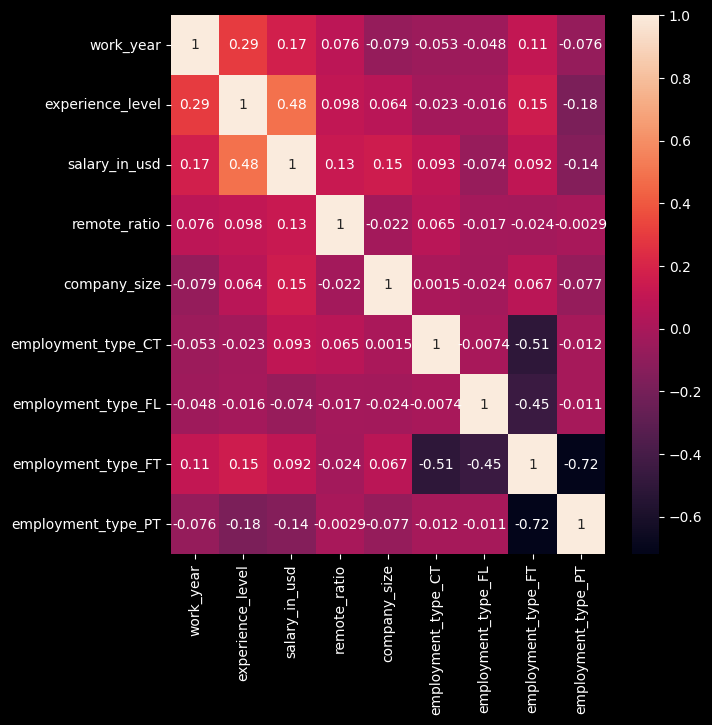

In [131]:
df_corr = one_hot_encoded_data[['work_year', 'experience_level','salary_in_usd','remote_ratio', 'company_size','employment_type_CT',  'employment_type_FL','employment_type_FT','employment_type_PT' ]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(df_corr,annot=True)

## Conclusiones
1. Experience level is a mayor factor for a data science job salary (Highest paid is Expert / Director level)
2. For higher salary apply to medium or large size companies
3. The United States is offering the most amount of jobs in the data science fields
4. Contract type jobs pay higher compared to full time, part time, and freelance
### Recomendations for dataset
1. Categorical values such as company size, remote ratio, employeement type, experience level are unbalanced so conclusiones made could have sample bias
